# Data Visualization 

## Food carbon footprint index 2018

### Using Plotly

In [2]:
import numpy as np
import pandas as pd

In [3]:
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
init_notebook_mode(connected=True)

In [6]:
data = pd.read_csv("C:\\Users\\user\\Downloads\\food_consumptionedited.csv")
data.head(10)

,country,Population,food_category,consumption,co2_emmission
0,Argentina,"45,195,774",Pork,10.51,37.20
1,Argentina,"45,195,774",Poultry,38.66,41.53
2,Argentina,"45,195,774",Beef,55.48,1712.00
3,Argentina,"45,195,774",Lamb & Goat,1.56,54.63
4,Argentina,"45,195,774",Fish,4.36,6.96
5,Argentina,"45,195,774",Eggs,11.39,10.46
6,Argentina,"45,195,774",Milk - inc. cheese,195.08,277.87
7,Argentina,"45,195,774",Wheat and Wheat Products,103.11,19.66
8,Argentina,"45,195,774",Rice,8.77,11.22
9,Argentina,"45,195,774",Soybeans,0.00,0.00


In [7]:
data["food_category"] = data["food_category"].astype("category")

Adding a new column which labels the column "food_category" to show which is a animal product and which is a non-animal product.

In [8]:
data["food_type"] = np.where((data.food_category =="Beef")|(data.food_category =="Eggs")|(data.food_category =="Pork")|(data.food_category =="Lamb & Goat")|(data.food_category =="Poultry")|(data.food_category =="Fish")|(data.food_category =="Milk - inc. cheese"),"Animal", "Non-Animal")
data["food_type"] = data["food_type"].astype("category")
data

,country,Population,food_category,consumption,co2_emmission,food_type
0,Argentina,"45,195,774",Pork,10.51,37.20,Animal
1,Argentina,"45,195,774",Poultry,38.66,41.53,Animal
2,Argentina,"45,195,774",Beef,55.48,1712.00,Animal
3,Argentina,"45,195,774",Lamb & Goat,1.56,54.63,Animal
4,Argentina,"45,195,774",Fish,4.36,6.96,Animal
...,...,...,...,...,...,...
1425,Bangladesh,"164,689,383",Milk - inc. cheese,21.91,31.21,Animal
1426,Bangladesh,"164,689,383",Wheat and Wheat Products,17.47,3.33,Non-Animal
1427,Bangladesh,"164,689,383",Rice,171.73,219.76,Non-Animal
1428,Bangladesh,"164,689,383",Soybeans,0.61,0.27,Non-Animal


In [9]:
a= data[data['country']=='Armenia']
b= data[data['country']=='Turkey']
c= data[data['country']=='Netherlands']
fig = px.pie(a, values='consumption', names='food_category', title='Product Consumption in Armenia', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()
fig = px.pie(b, values='consumption', names='food_category', title='Product Consumption in Turkey', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()
fig = px.pie(c, values='consumption', names='food_category', title='Product Consumption in the Netherlands', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [10]:
countries = ['China','India','USA']
food_categories= ['Beef','Milk - inc. cheese','Wheat and Wheat Products']
top = data[data.country.isin(countries) & data.food_category.isin(food_categories)]
top

,country,Population,food_category,consumption,co2_emmission,food_type
57,USA,"331,002,651",Beef,36.24,1118.29,Animal
61,USA,"331,002,651",Milk - inc. cheese,254.69,362.78,Animal
62,USA,"331,002,651",Wheat and Wheat Products,80.43,15.34,Non-Animal
981,China,"1,439,323,776",Beef,5.12,157.99,Animal
985,China,"1,439,323,776",Milk - inc. cheese,32.66,46.52,Animal
986,China,"1,439,323,776",Wheat and Wheat Products,63.36,12.08,Non-Animal
1333,India,"1,380,004,385",Beef,0.81,24.99,Animal
1337,India,"1,380,004,385",Milk - inc. cheese,84.50,120.36,Animal
1338,India,"1,380,004,385",Wheat and Wheat Products,60.56,11.55,Non-Animal


In [11]:
fig = px.bar(top, x='country', y='consumption', color="food_category", title="Top product consumption in top 3 countries with highest population",color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [12]:
fig = px.bar(data, x='country', y='consumption', color="food_category", title="Food consumption all over the word",color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [13]:
data_china = data[data.country == 'China']
fig = px.bar(data_china, x='food_category', y='consumption',
             labels={'consumption':'Food Consumption in Canada'},title="Product Consumption in China", height=400)
fig.show()

In [14]:
fig = px.scatter(top, x="co2_emmission", y="consumption", size="co2_emmission", color="country", log_x=True, size_max=60,color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [103]:
countrygroup = pd.pivot_table(data,index=["country"],values=["consumption"],columns=["food_type","food_category"],aggfunc=np.mean)
countrygroup

consumption                                                      \
food_type          Animal                                                       
food_category        Beef   Eggs   Fish Lamb & Goat Milk - inc. cheese   Pork   
country                                                                         
Albania             22.50  12.45   3.85       15.32             303.72  10.88   
Algeria              5.60   8.06   3.74        7.69             141.53   0.00   
Angola               8.42   1.11  15.24        1.08              12.30   8.89   
Argentina           55.48  11.39   4.36        1.56             195.08  10.51   
Armenia             19.66  11.69   4.36        3.02             209.03   9.67   
...                   ...    ...    ...         ...                ...    ...   
Uruguay             29.10  13.14   6.53        8.23             210.54  16.84   
Venezuela           25.89   5.63   8.34        0.32             117.79   7.23   
Vietnam              7.44   3.84  26.52        0.14              16.36  35.00   
Zambia               4.76   3.32   6.20        0.68               9.71   1.66   
Zimbabwe             7.37   1.75   2.80        0.96              31.90   2.65   

                                                                \
food_type                          Non-Animal                    
food_category Poultry Nuts inc. Peanut Butter    Rice Soybeans   
country                                                          
Albania         13.23                    4.36    7.78     0.00   
Algeria          7.42                    2.08    2.97     0.00   
Angola          17.33                    2.26    8.12     0.52   
Argentina       38.66                    0.49    8.77     0.00   
Armenia         13.35                    2.55    3.18     0.00   
...               ...                     ...     ...      ...   
Uruguay         27.45                    0.95   11.50     0.01   
Venezuela       39.28                    0.35   23.39     0.00   
Vietnam         12.36                    6.28  144.56     5.75   
Zambia           3.29                    5.04    3.05     7.30   
Zimbabwe         4.97                    2.22   10.09     0.54   

                                        
food_type                               
food_category Wheat and Wheat Products  
country                                 
Albania                         138.64  
Algeria                         185.42  
Angola                           40.72  
Argentina                       103.11  
Armenia                         130.60  
...                                ...  
Uruguay                         109.31  
Venezuela                        49.17  
Vietnam                          10.49  
Zambia                           12.10  
Zimbabwe                         31.31  

[130 rows x 11 columns]

In [115]:
AM = countrygroup.query('country == ["Armenia"]')
AM

consumption                                                    \
food_type          Animal                                                     
food_category        Beef   Eggs  Fish Lamb & Goat Milk - inc. cheese  Pork   
country                                                                       
Armenia             19.66  11.69  4.36        3.02             209.03  9.67   

                                                              \
food_type                          Non-Animal                  
food_category Poultry Nuts inc. Peanut Butter  Rice Soybeans   
country                                                        
Armenia         13.35                    2.55  3.18      0.0   

                                        
food_type                               
food_category Wheat and Wheat Products  
country                                 
Armenia                          130.6

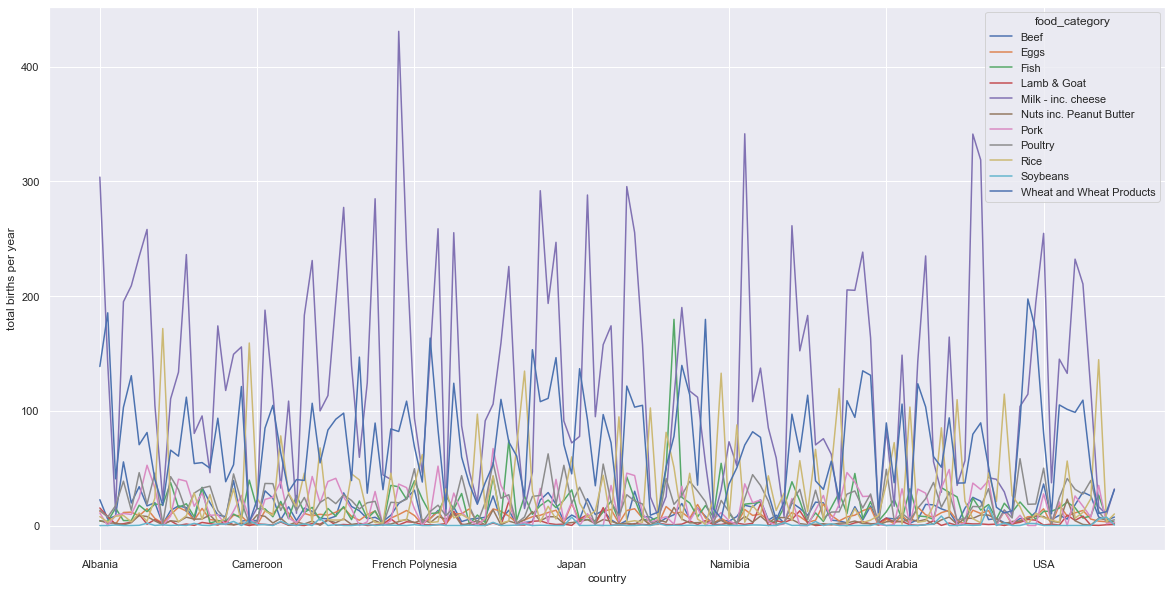

In [137]:
sns.set() 
data.pivot_table("consumption", index='country', columns='food_category', aggfunc='sum').plot(figsize=(20, 10))
plt.ylabel('total births per year');